In [ ]:
# Data Loading and Initial Exploration

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import math

In [20]:
data = pd.read_csv("Electronic_sales.csv")

In [21]:
# Display first few rows of the dataset to understand structure
data.head()

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56


In [22]:
# Check data types and non-null counts for all columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer ID        20000 non-null  int64  
 1   Age                20000 non-null  int64  
 2   Gender             19999 non-null  object 
 3   Loyalty Member     20000 non-null  object 
 4   Product Type       20000 non-null  object 
 5   SKU                20000 non-null  object 
 6   Rating             20000 non-null  int64  
 7   Order Status       20000 non-null  object 
 8   Payment Method     20000 non-null  object 
 9   Total Price        20000 non-null  float64
 10  Unit Price         20000 non-null  float64
 11  Quantity           20000 non-null  int64  
 12  Purchase Date      20000 non-null  object 
 13  Shipping Type      20000 non-null  object 
 14  Add-ons Purchased  15132 non-null  object 
 15  Add-on Total       20000 non-null  float64
dtypes: float64(3), int64(4

In [23]:
# Get basic descriptive statistics of the dataset
# This gives an overview of numeric fields
data.describe(include='all')

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
count,20000.000000,20000.000000,19999,20000,20000,20000,20000.000000,20000,20000,20000.000000,20000.000000,20000.000000,20000,20000,15132,20000.000000
unique,NaN,NaN,2,2,5,10,NaN,2,6,NaN,NaN,NaN,366,5,75,NaN
top,NaN,NaN,Male,No,Smartphone,TBL345,NaN,Completed,Credit Card,NaN,NaN,NaN,2024-04-26,Standard,Extended Warranty,NaN
freq,NaN,NaN,10164,15657,5978,2062,NaN,13432,5868,NaN,NaN,NaN,88,6725,1701,NaN
mean,10483.526550,48.994100,NaN,NaN,NaN,NaN,3.093950,NaN,NaN,3180.133419,578.631867,5.485550,NaN,NaN,NaN,62.244848
std,5631.732525,18.038745,NaN,NaN,NaN,NaN,1.223764,NaN,NaN,2544.978675,312.274076,2.870854,NaN,NaN,NaN,58.058431
min,1000.000000,18.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,20.750000,20.750000,1.000000,NaN,NaN,NaN,0.000000
25%,5478.000000,33.000000,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,1139.680000,361.180000,3.000000,NaN,NaN,NaN,7.615000
50%,10499.500000,49.000000,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,2534.490000,463.960000,5.000000,NaN,NaN,NaN,51.700000
75%,15504.000000,65.000000,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,4639.600000,791.190000,8.000000,NaN,NaN,NaN,93.842500


In [24]:
# Checking for unique values in each column
unique_values = data.nunique()
unique_values

Customer ID          12136
Age                     63
Gender                   2
Loyalty Member           2
Product Type             5
SKU                     10
Rating                   5
Order Status             2
Payment Method           6
Total Price            104
Unit Price              14
Quantity                10
Purchase Date          366
Shipping Type            5
Add-ons Purchased       75
Add-on Total         10036
dtype: int64

In [ ]:
# Missing Values Handling

In [25]:
missing_values = data.isnull().sum()
missing_values

Customer ID             0
Age                     0
Gender                  1
Loyalty Member          0
Product Type            0
SKU                     0
Rating                  0
Order Status            0
Payment Method          0
Total Price             0
Unit Price              0
Quantity                0
Purchase Date           0
Shipping Type           0
Add-ons Purchased    4868
Add-on Total            0
dtype: int64

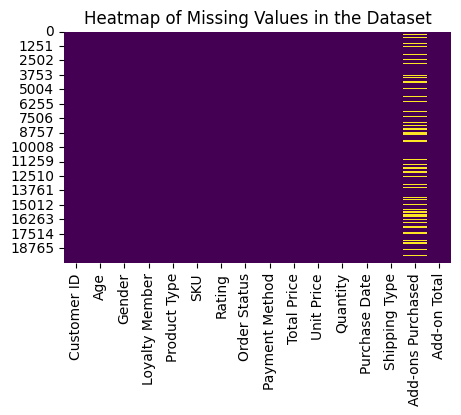

In [27]:
# Visualizing missing values using heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.title('Heatmap of Missing Values in the Dataset')
plt.show()

In [28]:
# Drop rows with missing 'Gender' values
data_cleaned = data.dropna(subset=['Gender'])

In [36]:
# Filling missing values for other columns, if any
# For example, filling missing 'Rating' with the mean of the column
if 'Rating' in data_cleaned.columns:
    print(data_cleaned['Rating'].dtype)

int64


In [37]:
# Ensure no missing values remain in critical fields
missing_values_cleaned = data_cleaned.isnull().sum()
missing_values_cleaned

Customer ID          0
Age                  0
Gender               0
Loyalty Member       0
Product Type         0
SKU                  0
Rating               0
Order Status         0
Payment Method       0
Total Price          0
Unit Price           0
Quantity             0
Purchase Date        0
Shipping Type        0
Add-ons Purchased    0
Add-on Total         0
dtype: int64

In [ ]:
# UNIVARIATE ANALYSIS

In [38]:
# Univariate analysis on Age
age_summary = data_cleaned['Age'].describe()
age_summary


count    19999.000000
mean        48.995200
std         18.038526
min         18.000000
25%         33.000000
50%         49.000000
75%         65.000000
max         80.000000
Name: Age, dtype: float64

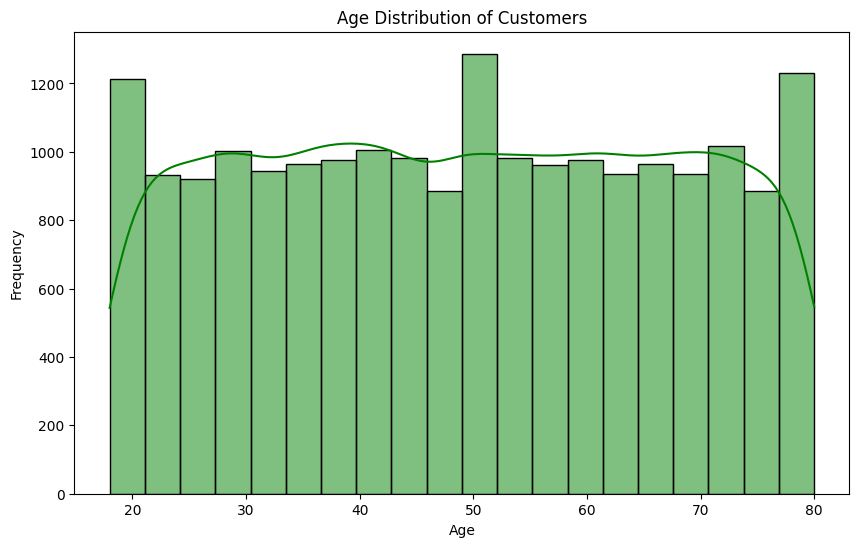

In [47]:
# Plot Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['Age'], kde=True, bins=20, color='green')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [48]:
# Analysis of Product Type distribution
product_type_counts = data_cleaned['Product Type'].value_counts()
product_type_counts

Product Type
Smartphone    5978
Tablet        4104
Laptop        3972
Smartwatch    3934
Headphones    2011
Name: count, dtype: int64

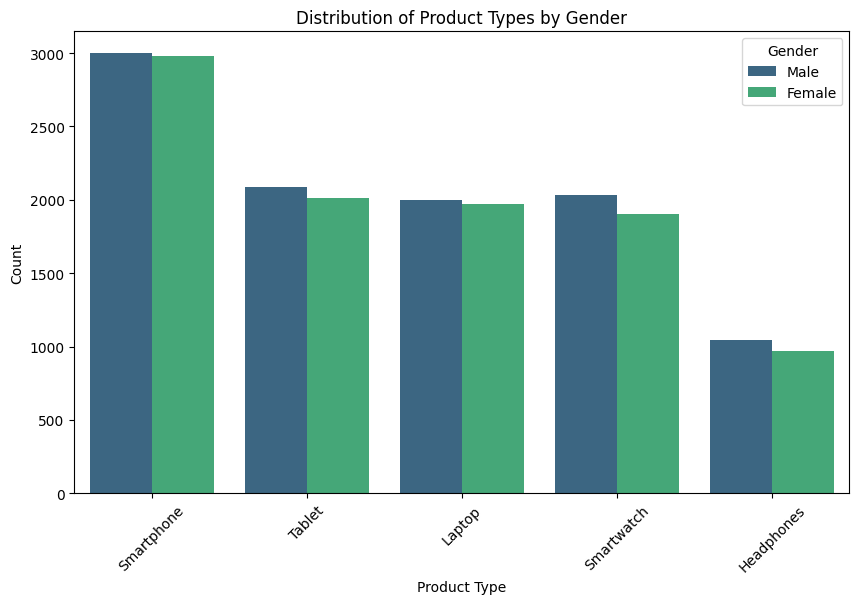

In [55]:
# Visualizing Product Type distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Product Type', data=data_cleaned, hue='Gender', palette='viridis')
plt.title('Distribution of Product Types by Gender')
plt.xlabel('Product Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [53]:
# Analysis of Payment Method distribution
payment_method_counts = data_cleaned['Payment Method'].value_counts()
payment_method_counts

Payment Method
Credit Card      5868
Bank Transfer    3370
PayPal           3284
Paypal           2514
Cash             2492
Debit Card       2471
Name: count, dtype: int64

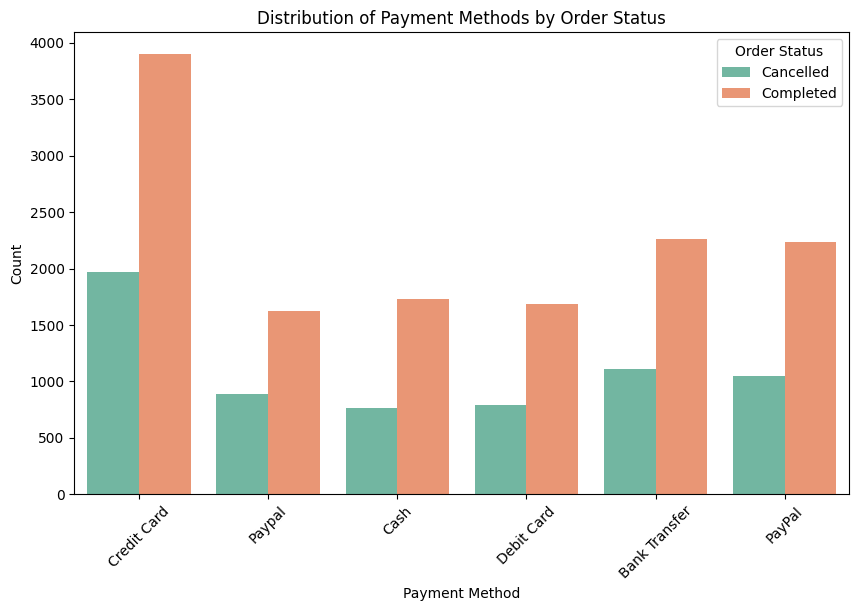

In [59]:
# Visualizing Payment Method distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Payment Method', data=data_cleaned, hue='Order Status', palette='Set2')
plt.title('Distribution of Payment Methods by Order Status')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


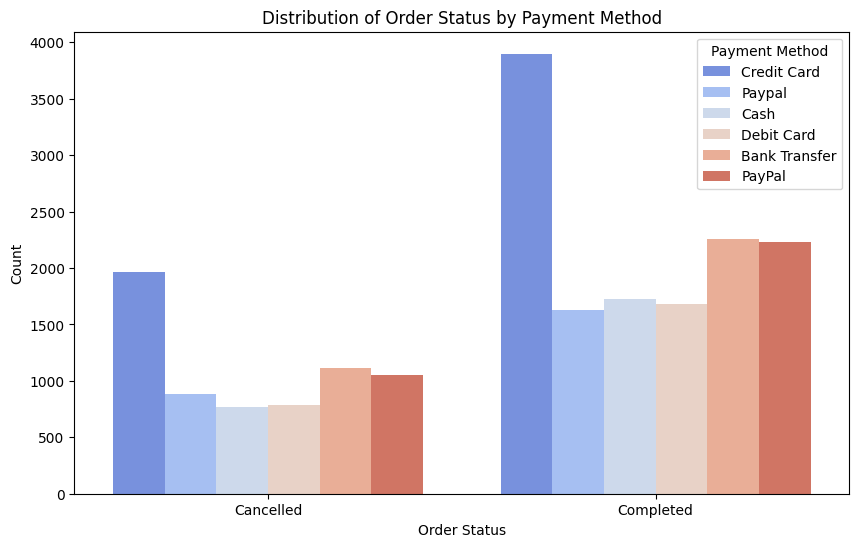

In [65]:
# Visualizing Order Status distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Order Status', data=data_cleaned, hue='Payment Method', palette='coolwarm')
plt.title('Distribution of Order Status by Payment Method')
plt.xlabel('Order Status')
plt.ylabel('Count')
plt.show()

In [ ]:
# VISUALIZATIONS AND FURTHER ANALYSIS

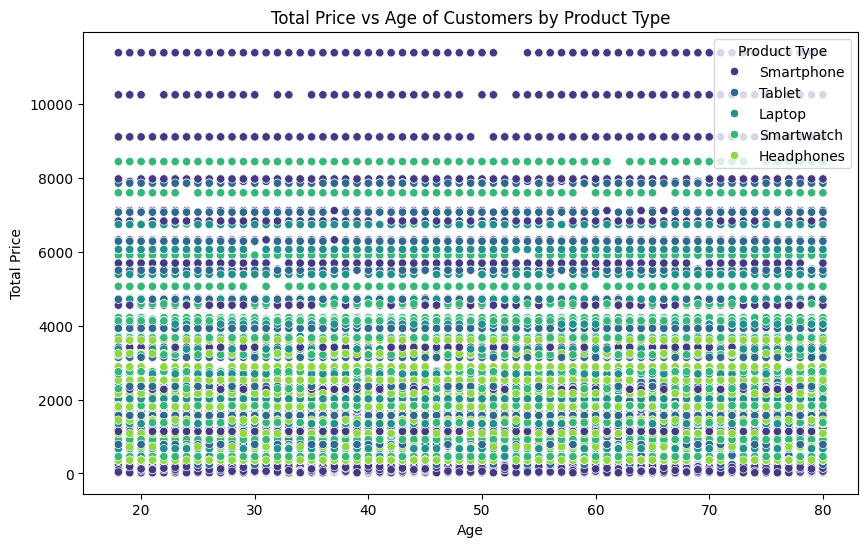

In [66]:
# Visualizing relationship between Age and Total Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Total Price', data=data_cleaned, hue='Product Type', palette='viridis')
plt.title('Total Price vs Age of Customers by Product Type')
plt.xlabel('Age')
plt.ylabel('Total Price')
plt.show()

In [67]:
# Analysis of Rating distribution
rating_summary = data_cleaned['Rating'].describe()
rating_summary

count    19999.000000
mean         3.093905
std          1.223778
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: Rating, dtype: float64

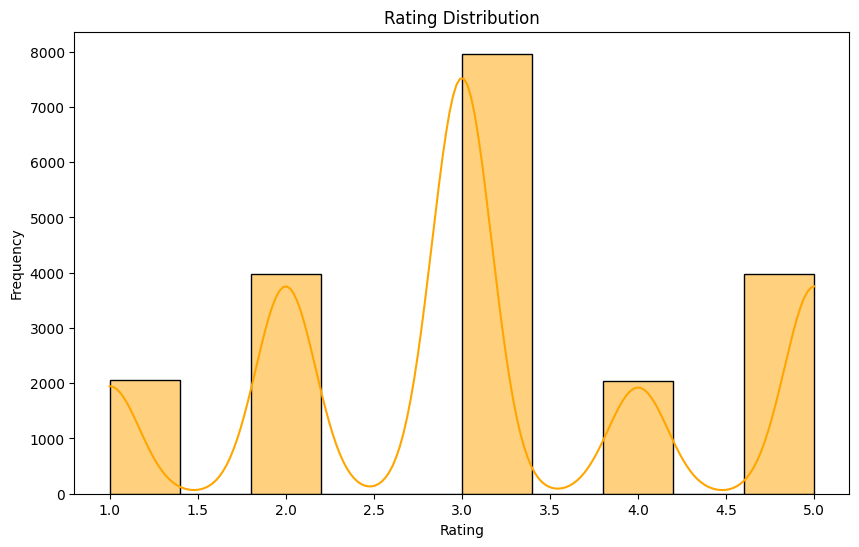

In [73]:
# Visualizing Rating distribution
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['Rating'], kde=True, bins=10, color='')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

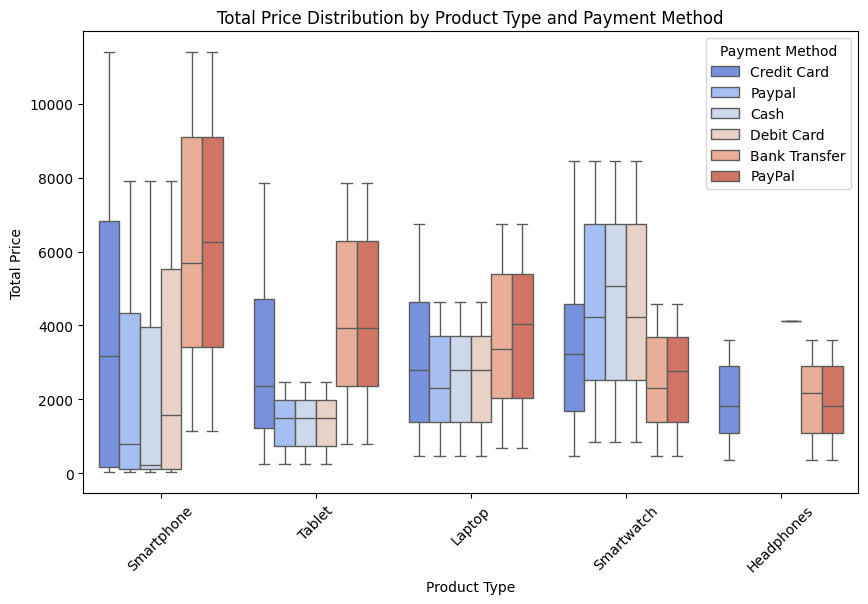

In [77]:
# Relationship between Product Type and Total Price
plt.figure(figsize=(10, 6))
sns.boxplot(x='Product Type', y='Total Price', data=data_cleaned, hue='Payment Method', palette='coolwarm')
plt.title('Total Price Distribution by Product Type and Payment Method')
plt.xlabel('Product Type')
plt.ylabel('Total Price')
plt.xticks(rotation=45)
plt.legend(title='Payment Method')
plt.show()

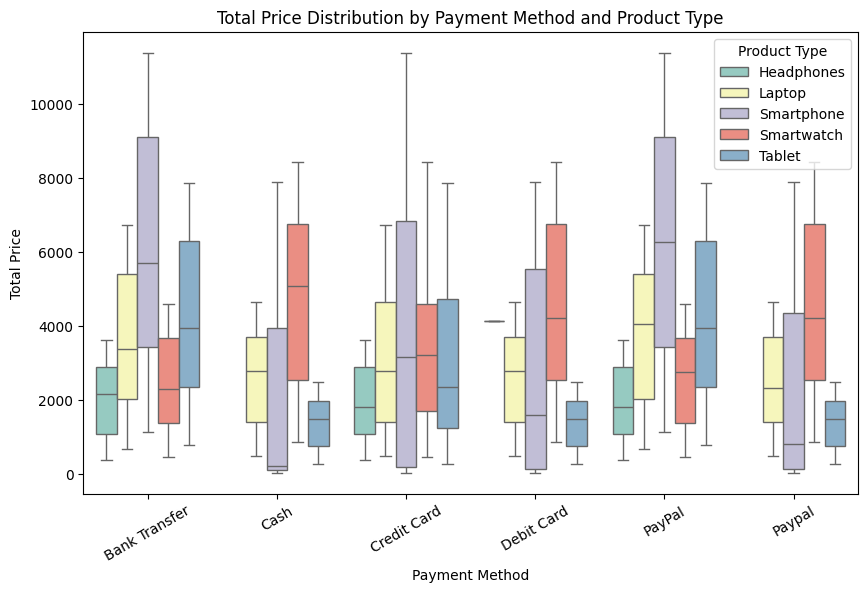

In [92]:
# Payment Method vs Total Price
plt.figure(figsize=(10, 6))
sns.boxplot(x='Payment Method', y='Total Price', data=data_cleaned, hue='Product Type', palette='Set3')
plt.title('Total Price Distribution by Payment Method and Product Type')
plt.xlabel('Payment Method')
plt.ylabel('Total Price')
plt.xticks(rotation=30)
plt.legend(title='Product Type')
plt.show()


In [91]:
# DATA CLEANING AND PREPARATION

In [90]:
# Convert 'Purchase Date' to datetime format
data_cleaned.loc[:, 'Purchase Date'] = pd.to_datetime(data_cleaned['Purchase Date'])

In [88]:
# Check for duplicate rows in the dataset
duplicate_rows = data_cleaned.duplicated().sum()
duplicate_rows

np.int64(0)

In [87]:
# If duplicates exist, remove them
if duplicate_rows > 0:
    data_cleaned = data_cleaned.drop_duplicates()

In [86]:
# Reset the index after cleaning
data_cleaned.reset_index(drop=True, inplace=True)

In [85]:
# Ensure the data types are correctly assigned (e.g., categorical or numerical)
data_cleaned.loc[:, 'Gender'] = data_cleaned['Gender'].astype('category')
data_cleaned.loc[:, 'Product Type'] = data_cleaned['Product Type'].astype('category')
data_cleaned.loc[:, 'Payment Method'] = data_cleaned['Payment Method'].astype('category')
data_cleaned.loc[:, 'Order Status'] = data_cleaned['Order Status'].astype('category')

In [83]:
# Save the cleaned data to a new CSV file
output_file_path = 'cleaned_electronics_sales_data.csv'
data_cleaned.to_csv(output_file_path, index=False)

In [82]:
# Display the cleaned data summary
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19999 entries, 0 to 19998
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer ID        19999 non-null  int64  
 1   Age                19999 non-null  int64  
 2   Gender             19999 non-null  object 
 3   Loyalty Member     19999 non-null  object 
 4   Product Type       19999 non-null  object 
 5   SKU                19999 non-null  object 
 6   Rating             19999 non-null  int64  
 7   Order Status       19999 non-null  object 
 8   Payment Method     19999 non-null  object 
 9   Total Price        19999 non-null  float64
 10  Unit Price         19999 non-null  float64
 11  Quantity           19999 non-null  int64  
 12  Purchase Date      19999 non-null  object 
 13  Shipping Type      19999 non-null  object 
 14  Add-ons Purchased  19999 non-null  object 
 15  Add-on Total       19999 non-null  float64
dtypes: float64(3), int64(4), ob